### Group 16: Electricity Usage IAM Challenge - Huiwei

Our group was allocated a dataset that consists 15 homes in both IDEAL and SMILE projects. 

•	SMILE – 2020 data from 7 homes with single occupancy

•	IDEAL Household Energy Dataset – 2017/2018 data from 8 homes with single occupancy

Plug-level monitors were installed to measure instantaneous power from household appliances. All values are in Watts. All data is in compressed CSV format; the CSV has two fields: timestamp and value. IAMs report changes in power use, rather than reporting at regular intervals. So there exist difficulties for us to produce figures that has proportioned time axis with proportioned sampling points. But whether it is a must to resample depends on specific circumstances.

As we are a group of 5 students, we dicided to share out the work, so the dataset was divided into some aspects (not some files) such as time, frequency, duration, Watts, use order, etc. We aimed not to do repetitive work, and I take charge of the duration part. Non-regular intervals make it sensitive and precise to calculate the duration of electricity of appliances each time. I'll introduce more about this important part - the calculate method later in this file.

At first, we can make use of the API Usage Example file and load all data into this file to make it easier to combine all data, and this is also a part of Assignment 3. It also can be concluded that how many, what are the names and what types of those files. I'll show little about this, for I am focusing on electricity use period, the later is more important. And I'll use some of the typical files as examples to visualize and explain some findings.

In [ ]:
import numpy as np
import pandas as pd

from IdealDataInterface import IdealDataInterface
folder_path = '.../csv.gz' # Add path here
ideal = IdealDataInterface(folder_path)

In [ ]:
ideal.room_types()
# Which room types are available?
ideal.categories()
# What categories are available?
# OTHER FUNCTIONS: 
# Search for some sensors
# Each item in data is a dictionary
# Resample the temperature readings and combine them in one DataFrame

There are 15 homes with 78 electric-appliances in all. 

In project SMILE, each home has one room, their home_id are the same as room_id, and there are at least 3 devices in one room. 

In project IDEAL, there are 8 homes, 3 of them have one room respectively, 3 have 2 rooms, one has 3 and the last one has 4 rooms. 

There exist many kinds of electric-appliances in each room such as vacuum cleaners, fridger freezers, kettles, microwaves, etc. In other words, different homes may have the same electric-appliances, which are meaningful to be compared. One home with an occupancy has a series of devices, and we can conclude the occupancy's living rules from electric-appliances' using with comprehensive combination and analysis of time, frequency, duration, Watts, use order, etc.

The identities of occupants in project SMILE were also given, let's have a look at them.

In [59]:
import numpy as np
import pandas as pd
excelFile = r'Energy data participants.xlsx'
SMILEparticipants = pd.DataFrame(pd.read_excel(excelFile))
# How to read Excel files
SMILEparticipants

,ID,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition,Location
0,2059,M,1954-09-21 00:00:00,66,None,None,Aberdeen
1,4206,M,1954-12-22 00:00:00,54,None,Mobility Issues,Livingston
2,1868,F,1959-06-29 00:00:00,61,None,Cerebral Palsy,Aberdeen
3,2059,M,1954-09-21 00:00:00,66,None,Stroke,Aberdeen
4,2688,M,1967-08-19 00:00:00,53,None,Mental Health Issue,Edinburgh
5,2583,M,Nil,70+,None,COPD,Edinburgh
6,1874,M,1952-10-01 00:00:00,68,None,Brain Injury,Aberdeen
7,5713,M,Nil,Nil,None,?,Edinburgh


In [63]:
pd.isnull(SMILEparticipants).any()
pd.isna(SMILEparticipants).any()
# Whether it is needed to detect None

ID                     False
Gender                 False
DateOfBirth            False
Age                    False
StaffPlanConditions    False
CareSysCondition       False
Location               False
dtype: bool

In [64]:
SMILEparticipants.drop_duplicates(subset = "ID", keep = 'last', inplace = True)
# Here I kept the last repetitive row because its description was more detailed in CareSysCondition.

In [65]:
SMILEparticipants.reset_index(inplace = True, drop = True)

In [66]:
SMILEparticipants

,ID,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition,Location
0,4206,M,1954-12-22 00:00:00,54,None,Mobility Issues,Livingston
1,1868,F,1959-06-29 00:00:00,61,None,Cerebral Palsy,Aberdeen
2,2059,M,1954-09-21 00:00:00,66,None,Stroke,Aberdeen
3,2688,M,1967-08-19 00:00:00,53,None,Mental Health Issue,Edinburgh
4,2583,M,Nil,70+,None,COPD,Edinburgh
5,1874,M,1952-10-01 00:00:00,68,None,Brain Injury,Aberdeen
6,5713,M,Nil,Nil,None,?,Edinburgh


In [67]:
SMILEparticipants.dtypes

ID                      int64
Gender                 object
DateOfBirth            object
Age                    object
StaffPlanConditions    object
CareSysCondition       object
Location               object
dtype: object

In [68]:
SMILEparticipants.shape[0]

7

It is clear that SMILE project has 7 participants, one participant was recorded twice in the file and removed one row then. Occupants are about the same age and most of them are male. The information about location and health condition are also essential for analysis.

One typical file ('home1868_room1868_sensor20508_electric-appliance_microwave.csv') was used in my analysis now, let's look at its format, which is quite the same with others.

In [69]:
import glob
glob.glob('*.csv')

['home1868_room1868_sensor20508_electric-appliance_microwave.csv',
 'home1868_room1868_sensor30508_electric-appliance_combi.csv',
 'home1868_room1868_sensor40508_electric-appliance_dishwasher.csv',
 'home1868_room1868_sensor50508_electric-appliance_coffee.csv',
 'home1868_room1868_sensor60508_electric-appliance_tv.csv',
 'home1868_room1868_sensor70508_electric-appliance_bed.csv',
 'home1874_room1874_sensor50508_electric-appliance_entertainment.csv',
 'home1874_room1874_sensor80508_electric-appliance_microwave.csv',
 'home1874_room1874_sensor90508_electric-appliance_tv.csv',
 'home2059_room2059_sensor20508_electric-appliance_microwave.csv',
 'home2059_room2059_sensor30508_electric-appliance_wheelchair.csv',
 'home2059_room2059_sensor40508_electric-appliance_entertainment.csv',
 'home2583_room2583_sensor20508_electric-appliance_microwave.csv',
 'home2583_room2583_sensor40508_electric-appliance_tumbledrier.csv',
 'home2583_room2583_sensor50508_electric-appliance_tv.csv',
 'home2688_room26

In [70]:
import pandas as pd
data = pd.read_csv('home1868_room1868_sensor20508_electric-appliance_microwave.csv', header = None)
data.columns = ["Timestamp", "Instantaneous Power"]

In [71]:
data.isnull().sum().sort_values(ascending = False)

Instantaneous Power    0
Timestamp              0
dtype: int64

In [72]:
data.head()

,Timestamp,Instantaneous Power
0,2020-01-08 15:09:27.370,0.0
1,2020-01-08 16:09:27.293,0.0
2,2020-01-08 17:09:27.207,0.0
3,2020-01-08 18:09:27.190,0.0
4,2020-01-08 19:09:27.170,0.0


In [73]:
data.dtypes

Timestamp               object
Instantaneous Power    float64
dtype: object

In [74]:
data

,Timestamp,Instantaneous Power
0,2020-01-08 15:09:27.370,0.0
1,2020-01-08 16:09:27.293,0.0
2,2020-01-08 17:09:27.207,0.0
3,2020-01-08 18:09:27.190,0.0
4,2020-01-08 19:09:27.170,0.0
...,...,...
7134,2020-10-17 18:43:13.980,0.0
7135,2020-10-17 19:43:13.927,0.0
7136,2020-10-17 20:43:13.867,0.0
7137,2020-10-17 21:43:13.843,0.0


In [76]:
data.drop_duplicates(keep = 'first', inplace = True)
data
# There're many duplicated rows!

,Timestamp,Instantaneous Power
0,2020-01-08 15:09:27.370,0.0
1,2020-01-08 16:09:27.293,0.0
2,2020-01-08 17:09:27.207,0.0
3,2020-01-08 18:09:27.190,0.0
4,2020-01-08 19:09:27.170,0.0
...,...,...
7134,2020-10-17 18:43:13.980,0.0
7135,2020-10-17 19:43:13.927,0.0
7136,2020-10-17 20:43:13.867,0.0
7137,2020-10-17 21:43:13.843,0.0


In [77]:
assert [data.duplicated() == False], 'Duplicated rows still exist.'

In [78]:
data.reset_index(inplace = True,drop = True)
data

,Timestamp,Instantaneous Power
0,2020-01-08 15:09:27.370,0.0
1,2020-01-08 16:09:27.293,0.0
2,2020-01-08 17:09:27.207,0.0
3,2020-01-08 18:09:27.190,0.0
4,2020-01-08 19:09:27.170,0.0
...,...,...
6661,2020-10-17 18:43:13.980,0.0
6662,2020-10-17 19:43:13.927,0.0
6663,2020-10-17 20:43:13.867,0.0
6664,2020-10-17 21:43:13.843,0.0


In [79]:
data['Instantaneous Power'].describe()

count    6666.000000
mean      190.744239
std       420.660672
min         0.000000
25%         0.000000
50%         0.000000
75%        43.900000
max      1290.200000
Name: Instantaneous Power, dtype: float64

Text(0.5, 1.0, 'Every Instantaneous Power - Scatter Diagram')

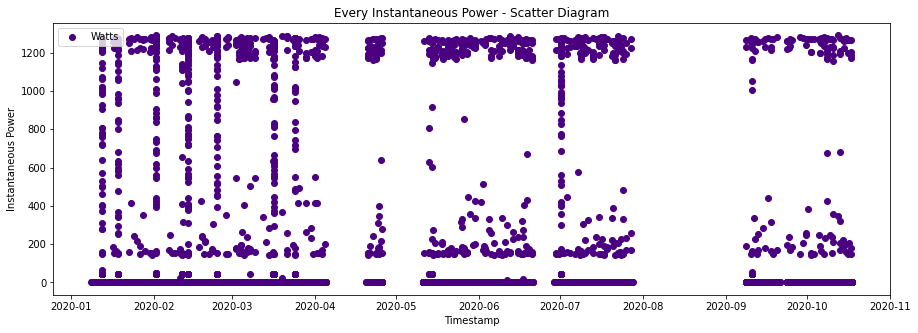

In [80]:
import matplotlib
import matplotlib.pyplot as plt
dates = matplotlib.dates.date2num(data["Timestamp"]) # Change the format of date to visualize
plt.figure(figsize=(15, 5)) 
plt.xlabel('Timestamp')
plt.ylabel('Instantaneous Power')
plt.plot_date(dates, data["Instantaneous Power"], label = 'Watts', color= 'indigo')
plt.legend(loc = 'upper left')
plt.title('Every Instantaneous Power - Scatter Diagram')

In [82]:
data.to_csv('home1868_room1868_sensor20508_electric-appliance_microwave.csv', encoding = 'utf-8', index = False, header = None)
# Remember to let 'header' = 'None', or the csv will include the labels
data

,Timestamp,Instantaneous Power
0,2020-01-08 15:09:27.370,0.0
1,2020-01-08 16:09:27.293,0.0
2,2020-01-08 17:09:27.207,0.0
3,2020-01-08 18:09:27.190,0.0
4,2020-01-08 19:09:27.170,0.0
...,...,...
6661,2020-10-17 18:43:13.980,0.0
6662,2020-10-17 19:43:13.927,0.0
6663,2020-10-17 20:43:13.867,0.0
6664,2020-10-17 21:43:13.843,0.0


After a simple analysis of the data in 'home1868_room1868_sensor20508_electric-appliance_microwave.csv', I'm familiar with its data format and meaning of the content. 

During the period that the device was not used, the monitor worked and record 0 Watts. Instantaneous power was not recorded by regular intervals, especially between use time and non-use period. It means that when an electric-appliance was activated, its plug-in monitor began to record the non-0 power timely and frequently. When users finished using, the monitor returned 0 Watts and began a longer interval.

From the analysis mentioned above, it can be concluded that the start time of the electric-appliance is when the instantaneous power turn to a non-0 value from 0, the corresponding time of the non-0 value is the start of once use. The end time of using is when the instantaneous power turn to 0 from a non-0 value, the corresponding time of the first 0 shown under a series of non-0 is the end time.

I have tested before, one use of the microwave may last about 2 minutes normally, and this file may have some subtle error. There exists few-seconds use, which can be hardly noticed in a graph. So after calculating the use period every time, I focused on daily use total period and planned to show it more uniformly.

How to calculate daily period? What if the user used an electric-appliance involving 12am? The daily use period is not just added by every time in the day. It's a must to judge if the last use of the day continued until tomorrow. In other words, whether the last instantaneous power of the day was non-0, if so, where's the first 0 of the next day. Under this circumstances, I need to do some calculation to ensure the daily use value is correct. 

In the process of calculation, I removed non-use days and only showed those dates that the electric-appliance was used. The reason is, if those non-use days exist, there will be many 0 Watts on graphs and make it unclear to judge the trend, and the x axis will be longer. Also, the minimum value will be 0, which is meaningless. The mean value and other related statistic numbers will also decrease in a degree. So please pay attention on use days! But this will also produce some problems, without 0-Watts days, does daily use period also consist with normal distribution?

After a daily use calculation, I added all periods up and worked out the total time of this electric-appliance during monitoring period.

Let's look at the calculation!

In [83]:
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from datetime import datetime,timedelta

print("Use period every time & everyday:")
if __name__ == '__main__':
	flag = 0
	dayt = {}
	totalt = timedelta()
	f = csv.reader(open('home1868_room1868_sensor20508_electric-appliance_microwave.csv', 'r'))
	for row in f:
		cpower = float(row[1])
		if(flag == 0):
			if(cpower != 0.0):
				start = row[0]
				flag = 1
		else:
			if(cpower == 0.0):
				# Calculate usage period every time, renew daily usage, add up total time
				end = row[0]
				start0 = datetime.strptime(start, "%Y-%m-%d %H:%M:%S.%f")
				end0 = datetime.strptime(end, "%Y-%m-%d %H:%M:%S.%f")
				dur = end0 - start0
				# Renew daily
				startday, starttime = start.split(' ')
				endday, endtime = end.split(' ')
				t1 = dur				# First day period
				t2 = timedelta()		# Next day period
				print(startday, dur)
				if(startday != endday):
					temp = datetime.strptime(startday + ' 23:59:59.999999', "%Y-%m-%d %H:%M:%S.%f")
					t1 = temp - start0
					t2 = dur - t1
				if startday in dayt:
					dayt[startday] += t1
				else:
					dayt[startday] = t1
				if endday in dayt:
					dayt[endday] += t2
				else:
					dayt[endday] = t2
				# Add up total time
				totalt += dur
				flag = 0
	for e in dayt:
		print(e, dayt[e])
	print("Total use period: ", totalt)
"""	
t1 = '2020-11-07 04:30:03.0' 
t2 = '2020-11-08 05:32:04.100' 

start = datetime.strptime(str(t1), "%Y-%m-%d %H:%M:%S.%f")
end = datetime.strptime(str(t2), "%Y-%m-%d %H:%M:%S.%f")
o1 = end - start
t1 = '2020-11-07 04:30:03.0' 
t2 = '2020-11-07 23:59:59.999999' 

start = datetime.strptime(str(t1), "%Y-%m-%d %H:%M:%S.%f")
end = datetime.strptime(str(t2), "%Y-%m-%d %H:%M:%S.%f")	
o2 = end - start
print(o2)
"""

Use period every time & everyday:
2020-01-12 0:04:57.914000
2020-01-12 0:05:04.970000
2020-01-12 0:01:28.040000
2020-01-12 0:01:39
2020-01-16 0:01:04.907000
2020-01-16 0:02:25.030000
2020-01-16 0:01:09
2020-01-17 0:02:38.993000
2020-01-18 0:05:55.936000
2020-01-18 0:02:03.950000
2020-01-18 0:01:53.013000
2020-01-18 0:01:43
2020-01-22 0:01:05.917000
2020-01-22 0:03:53.040000
2020-01-23 0:05:07.003000
2020-01-24 0:04:23.913000
2020-01-25 0:03:31.990000
2020-01-26 0:02:13.030000
2020-01-26 0:00:49
2020-01-27 0:00:44.103000
2020-01-27 0:02:50.007000
2020-01-27 0:01:23.096000
2020-01-28 0:03:40.930000
2020-01-30 0:03:40.990000
2020-01-30 0:03:45.967000
2020-01-30 0:04:20.073000
2020-01-31 0:00:54.954000
2020-02-01 0:00:45.006000
2020-02-01 0:08:30.930000
2020-02-01 0:04:29.030000
2020-02-06 0:00:16.830000
2020-02-06 0:00:20.007000
2020-02-06 0:03:12.147000
2020-02-06 0:01:03.097000
2020-02-06 0:02:38.977000
2020-02-07 0:03:03.027000
2020-02-07 0:00:16.996000
2020-02-08 0:03:23.943000
2020-0

'\t\nt1 = \'2020-11-07 04:30:03.0\' \nt2 = \'2020-11-08 05:32:04.100\' \n\nstart = datetime.strptime(str(t1), "%Y-%m-%d %H:%M:%S.%f")\nend = datetime.strptime(str(t2), "%Y-%m-%d %H:%M:%S.%f")\no1 = end - start\nt1 = \'2020-11-07 04:30:03.0\' \nt2 = \'2020-11-07 23:59:59.999999\' \n\nstart = datetime.strptime(str(t1), "%Y-%m-%d %H:%M:%S.%f")\nend = datetime.strptime(str(t2), "%Y-%m-%d %H:%M:%S.%f")\t\no2 = end - start\nprint(o2)\n'

In [85]:
import pandas as pd
daytime = pd.DataFrame.from_dict(dayt, orient = 'index', columns = ['Day_Period'] )
daytime = daytime.reset_index().rename(columns = {'index': 'Date'})
# Load daytime from dictionary to dataframe
daytime.head()

,Date,Day_Period
0,2020-01-12,0 days 00:13:09.924000
1,2020-01-16,0 days 00:04:38.937000
2,2020-01-17,0 days 00:02:38.993000
3,2020-01-18,0 days 00:11:35.899000
4,2020-01-22,0 days 00:04:58.957000


In [86]:
daytime

,Date,Day_Period
0,2020-01-12,0 days 00:13:09.924000
1,2020-01-16,0 days 00:04:38.937000
2,2020-01-17,0 days 00:02:38.993000
3,2020-01-18,0 days 00:11:35.899000
4,2020-01-22,0 days 00:04:58.957000
...,...,...
143,2020-10-13,0 days 00:04:04.857000
144,2020-10-14,0 days 00:05:59.033000
145,2020-10-15,0 days 00:03:22.017000
146,2020-10-16,0 days 00:08:40.887000


In [87]:
daytime.describe()

,Day_Period
count,148
mean,0 days 00:07:14.359114864
std,0 days 00:03:59.089788245
min,0 days 00:00:54.954000
25%,0 days 00:03:37.315000
50%,0 days 00:06:38.497000
75%,0 days 00:09:38.949500
max,0 days 00:21:18.610000


In [99]:
print("In the measuring period except for device-unused (all 0 on instantaneous power) days: ")
print("The total amount of time spent with electricity on this device was: ", daytime["Day_Period"].sum())
print("The mean amount of time spent with electricity on this device every day was: ", daytime["Day_Period"].mean())
print("The large amount of time spent with electricity on this device per day was: ", daytime["Day_Period"].max())
print("The minimum amount of time spent with electricity on this device per day was: ", daytime["Day_Period"].min())
print("The median amount of time spent with electricity on this device per day was: ", daytime["Day_Period"].median())

In the measuring period except for device-unused (all 0 on instantaneous power) days: 
The total amount of time spent with electricity on this device was:  0 days 17:51:25.149000
The mean amount of time spent with electricity on this device every day was:  0 days 00:07:14.359114864
The large amount of time spent with electricity on this device per day was:  0 days 00:21:18.610000
The minimum amount of time spent with electricity on this device per day was:  0 days 00:00:54.954000
The median amount of time spent with electricity on this device per day was:  0 days 00:06:38.497000


In [100]:
daytime.dtypes

Date                   object
Day_Period    timedelta64[ns]
dtype: object

In [101]:
daytime["Day_Period"] = pd.to_numeric(daytime["Day_Period"])
daytime

,Date,Day_Period
0,2020-01-12,789924000000
1,2020-01-16,278937000000
2,2020-01-17,158993000000
3,2020-01-18,695899000000
4,2020-01-22,298957000000
...,...,...
143,2020-10-13,244857000000
144,2020-10-14,359033000000
145,2020-10-15,202017000000
146,2020-10-16,520887000000


In [102]:
daytime.dtypes

Date          object
Day_Period     int64
dtype: object

In [103]:
from scipy.stats import skew
print('Skewness:%f'%daytime["Day_Period"].skew())
print('Kurtosis:%f'%daytime["Day_Period"].kurt())

Skewness:0.848655
Kurtosis:0.354203


Skewness = 0.848655 > 0, positive deviation. The long tail is trailing to the right, and there are some outliers at the right end of the data.

Kurtosis = 0.354203 > 0, it's steeper than normal distribution.

This can be verified in later graphs.

Text(0.5, 1.0, 'Daily Usage Time - Timing Diagram')

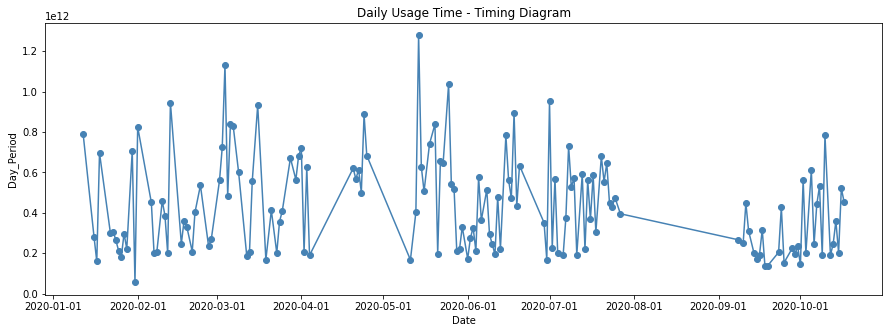

In [106]:
import matplotlib
dates = matplotlib.dates.date2num(daytime["Date"])
plt.figure(figsize=(15, 5)) 
plt.xlabel('Date')
plt.ylabel('Day_Period')
plt.plot_date(dates, daytime["Day_Period"], color= 'steelblue', linestyle='solid')
# If there does not exist solid 'linestyle' description, the graph would be like scatter diagram.
date_format = matplotlib.dates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('Daily Usage Time - Timing Diagram')

A messy distribution.

Text(0.5, 1.0, 'Day Period - Distribution Diagram')

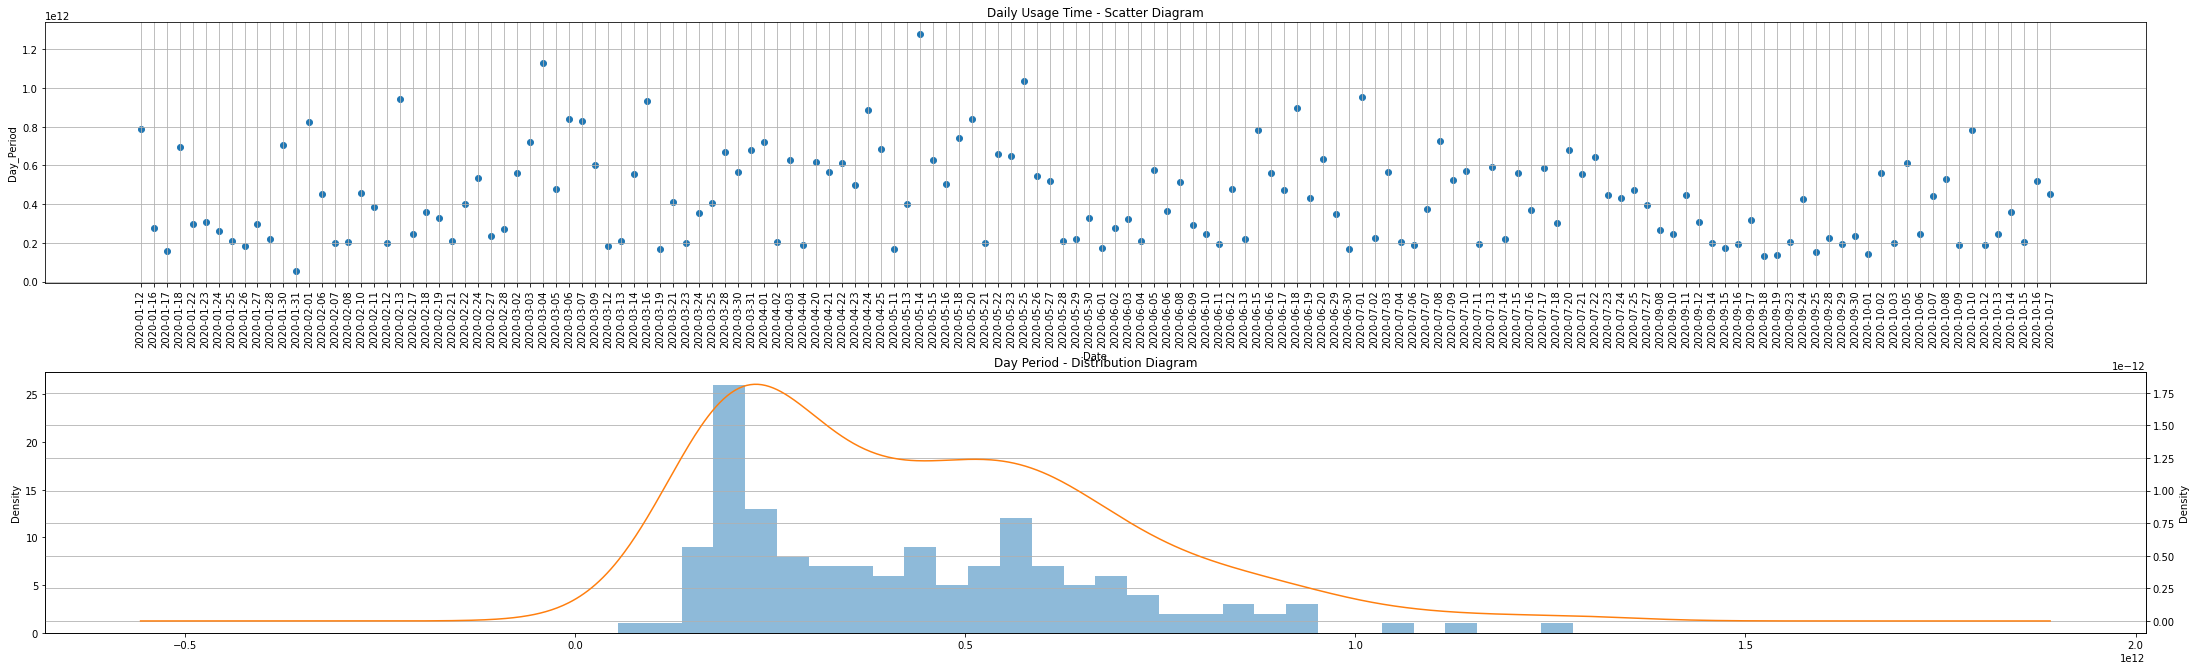

In [107]:
fig = plt.figure(figsize = (30,9))

ax1 = fig.add_subplot(2,1,1)  # Form a subplot 1
ax1.scatter(daytime["Date"], daytime["Day_Period"].values)
plt.xlabel('Date')
plt.ylabel('Day_Period')
plt.xticks(rotation=90) # Make dates clearer
plt.grid()
plt.title('Daily Usage Time - Scatter Diagram')
plt.tight_layout()

ax2 = fig.add_subplot(2,1,2)  # Form a subplot 2: Data distribution diagram
daytime["Day_Period"].hist(bins = 30, alpha = 0.5, ax = ax2)
daytime["Day_Period"].plot(kind = 'kde', secondary_y = True, ax = ax2) # Make the y axis shown at right
plt.xlabel('Day_Period')
plt.ylabel('Density')
plt.grid()
plt.title('Day Period - Distribution Diagram')

The Scatter Diagram is quite clear. The distribution especially the fitted curve looks normal, is it? And there're two peaks. Let data speak. From skewness, it is true that 'The long tail is trailing to the right, and there are some outliers at the right end of the data.'

<AxesSubplot:>

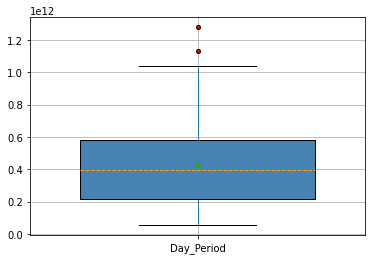

In [109]:
daytime.boxplot(column=["Day_Period"], whis = 1.5, widths = 0.7, patch_artist = True, showmeans = True, boxprops = {'facecolor':'steelblue'}, flierprops = {'markerfacecolor':'red', 'markersize':4}, medianprops = {'linestyle':'--','color':'orange'}, labels = [''])
# Use many characters to make it clearer, there're 2 outliers but fine.

The daily usage time analysis of a sensor of a room of a home is finished! What if I involve the same electric-appliances in different home with different occupants and different electric-appliances with the same occupant respectively in the same graph?

I loaded 'home1868_room1868_sensor20508_electric-appliance_microwave.csv' before, and then I'll load 'home1874_room1874_sensor80508_electric-appliance_microwave.csv' and 'home1868_room1868_sensor40508_electric-appliance_dishwasher.csv' to find some rules. 

As you can see, one occupant might have 2 same eletric-appliances, the person (ID 2688) has 2 televisions in one room, interesting things can be found by analysing their data, I'll analyse more in Assignment 3.

2020-01-17 0:00:02.010000
2020-01-18 0:03:54.014000
2020-01-19 0:03:01.940000
2020-01-20 0:08:51.320000
2020-01-21 0:05:03.864000
2020-01-22 0:07:53.037000
2020-01-23 0:08:26.121000
2020-01-24 0:02:59.933000
2020-01-25 0:09:25.264000
2020-01-27 0:09:46.980000
2020-01-28 0:02:42.057000
2020-01-29 0:01:18.930000
2020-01-30 0:08:27.097000
2020-01-31 0:09:04.100000
2020-02-03 0:08:29.872000
2020-02-05 0:03:37.813000
2020-02-06 0:10:01.633000
2020-02-07 0:09:21.960000
2020-02-08 0:02:45.119000
2020-02-11 0:03:39.940000
2020-02-12 0:10:19.470000
2020-02-13 0:07:51.956000
2020-02-14 0:06:17.920000
2020-02-15 0:10:11.117000
2020-02-17 0:09:49.880000
2020-02-18 0:09:00.978000
2020-02-19 0:01:44.016000
2020-02-20 0:08:56.007000
2020-02-21 0:11:00.214000
2020-02-22 0:06:21.977000
2020-02-24 0:06:57.009000
2020-02-26 0:03:35.980000
2020-02-27 0:03:19.954000
2020-02-28 0:09:36.126000
2020-03-02 0:10:39.003000
2020-03-03 0:08:37.060000
2020-03-04 0:12:56.019000
2020-03-05 0:09:56.979000
2020-03-06 0

<AxesSubplot:>

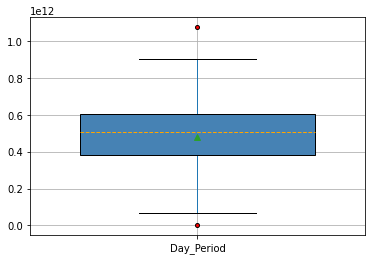

In [110]:
# Here're the same duration calculation codes as previous, you can ignore them and focus on the combination graphs after that.
# If I wanna process multiple data in different files, I'll take advantage of that API.

data1 = pd.read_csv('home1874_room1874_sensor80508_electric-appliance_microwave.csv', header = None)
data1.drop_duplicates(keep = 'first', inplace = True)
data1.reset_index(inplace = True,drop = True)
data1.to_csv('home1874_room1874_sensor80508_electric-appliance_microwave.csv', encoding = 'utf-8', index = False, header = None)

if __name__ == '__main__':
	flag1 = 0
	dayt1 = {}
	totalt1 = timedelta()
	f1 = csv.reader(open('home1874_room1874_sensor80508_electric-appliance_microwave.csv', 'r'))
	for row in f1:
		cpower = float(row[1])
		if(flag1 == 0):
			if(cpower != 0.0):
				start = row[0]
				flag1 = 1
		else:
			if(cpower == 0.0):
				# Calculate usage period every time, renew daily usage, add up total time
				end = row[0]
				start0 = datetime.strptime(start, "%Y-%m-%d %H:%M:%S.%f")
				end0 = datetime.strptime(end, "%Y-%m-%d %H:%M:%S.%f")
				dur1 = end0 - start0
				# Renew daily
				startday, starttime = start.split(' ')
				endday, endtime = end.split(' ')
				t1 = dur1				# First day period
				t2 = timedelta()		# Next day period
				if(startday != endday):
					temp = datetime.strptime(startday + ' 23:59:59.999999', "%Y-%m-%d %H:%M:%S.%f")
					t1 = temp - start0
					t2 = dur1 - t1
				if startday in dayt1:
					dayt1[startday] += t1
				else:
					dayt1[startday] = t1
				if endday in dayt1:
					dayt1[endday] += t2
				else:
					dayt1[endday] = t2
				# Add up total time
				totalt1 += dur1
				flag1 = 0
for e in dayt1:
    print(e, dayt1[e])
print("Total use period: ", totalt1)

daytime1 = pd.DataFrame.from_dict(dayt1, orient = 'index', columns = ['Day_Period'] )
daytime1 = daytime1.reset_index().rename(columns = {'index': 'Date'})
daytime1["Day_Period"] = pd.to_numeric(daytime1["Day_Period"])
dates1 = matplotlib.dates.date2num(daytime1["Date"])
daytime1.boxplot(column=["Day_Period"], whis = 1.5, widths = 0.7, patch_artist = True, showmeans = True, boxprops = {'facecolor':'steelblue'}, flierprops = {'markerfacecolor':'red', 'markersize':4}, medianprops = {'linestyle':'--','color':'orange'}, labels = [''])

By printing daily usage time, total time and boxplot of 'home1874_room1874_sensor80508_electric-appliance_microwave.csv', there were nothing strange. I can suppose that this file was loaded successful. Let's look at the next one with amazed feeling!

2020-01-12 12:40:29.487999
2020-01-13 17:01:16.990000
2020-01-15 2:24:19
2020-01-18 8:32:54.538999
2020-01-19 14:56:22.093000
2020-01-23 2:30:55.741000
2020-01-27 6:45:11.767000
2020-02-03 7:23:59.566000
2020-02-06 5:09:50.982000
2020-02-12 4:39:53.102000
2020-02-20 3:34:31.563999
2020-02-21 10:09:17.380000
2020-02-24 4:09:27.907000
2020-02-27 4:10:30.676999
2020-02-28 11:04:22.250000
2020-03-03 4:35:41.663000
2020-03-05 6:42:12.697000
2020-03-10 4:33:58.935000
2020-03-14 5:39:49.737999
2020-03-16 1 day, 5:12:13.260000
2020-03-19 2:18:00.809000
2020-03-23 9:07:58.374000
2020-03-27 3:44:17.856999
2020-03-28 10:14:17.373000
2020-03-30 7:59:10.526000
2020-04-04 6:43:49.392999
2020-04-19 15 days, 6:01:48.456000
2020-04-20 4:03:52.543000
2020-04-23 5:10:24.031000
2020-04-25 2:26:07.099000
2020-05-12 4:53:11.047000
2020-05-16 9:13:28.669999
2020-05-17 1 day, 7:43:22.193000
2020-05-20 2:53:32.395000
2020-05-27 8:33:46.373000
2020-06-04 2:23:32.001000
2020-06-11 4:47:51.531000
2020-06-16 4:26:

<AxesSubplot:>

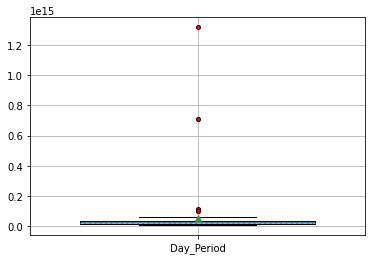

In [111]:
data2 = pd.read_csv('home1868_room1868_sensor40508_electric-appliance_dishwasher.csv', header = None)
data2.drop_duplicates(keep = 'first', inplace = True)
data2.reset_index(inplace = True,drop = True)
data2.to_csv('home1868_room1868_sensor40508_electric-appliance_dishwasher.csv', encoding = 'utf-8', index = False, header = None)

if __name__ == '__main__':
	flag2 = 0
	dayt2 = {}
	totalt2 = timedelta()
	f2 = csv.reader(open('home1868_room1868_sensor40508_electric-appliance_dishwasher.csv', 'r'))
	for row in f2:
		cpower = float(row[1])
		if(flag2 == 0):
			if(cpower != 0.0):
				start = row[0]
				flag2 = 1
		else:
			if(cpower == 0.0):
				# Calculate usage period every time, renew daily usage, add up total time
				end = row[0]
				start0 = datetime.strptime(start, "%Y-%m-%d %H:%M:%S.%f")
				end0 = datetime.strptime(end, "%Y-%m-%d %H:%M:%S.%f")
				dur2 = end0 - start0
				# Renew daily
				startday, starttime = start.split(' ')
				endday, endtime = end.split(' ')
				t1 = dur2				# First day period
				t2 = timedelta()		# Next day period
				if(startday != endday):
					temp = datetime.strptime(startday + ' 23:59:59.999999', "%Y-%m-%d %H:%M:%S.%f")
					t1 = temp - start0
					t2 = dur2 - t2
				if startday in dayt2:
					dayt2[startday] += t1
				else:
					dayt2[startday] = t1
				if endday in dayt2:
					dayt2[endday] += t2
				else:
					dayt2[endday] = t2
				# Add up total time
				totalt2 += dur2
				flag2 = 0
	for e in dayt2:
		print(e, dayt2[e])
	print("Total use period: ", totalt2)

daytime2 = pd.DataFrame.from_dict(dayt2, orient = 'index', columns = ['Day_Period'] )
daytime2 = daytime2.reset_index().rename(columns = {'index': 'Date'})
daytime2["Day_Period"] = pd.to_numeric(daytime2["Day_Period"])
dates2 = matplotlib.dates.date2num(daytime2["Date"])
daytime2.boxplot(column=["Day_Period"], whis = 1.5, widths = 0.7, patch_artist = True, showmeans = True, boxprops = {'facecolor':'steelblue'}, flierprops = {'markerfacecolor':'red', 'markersize':4}, medianprops = {'linestyle':'--','color':'orange'}, labels = [''])

In [112]:
Q1 = daytime2["Day_Period"].quantile(q = 0.25)
Q3 = daytime2["Day_Period"].quantile(q = 0.75)
low_whisker = Q1 - 1.5 * (Q3 - Q1)
up_whisker = Q3 + 1.6 * (Q3 - Q1)
daytime2["Day_Period"][(daytime2["Day_Period"] > up_whisker) | (daytime2["Day_Period"] < low_whisker)]
# Use boxplot to find outliers

19     105133260000000
26    1317708456000000
32     114202193000000
40     709338467000000
59      99086513000000
Name: Day_Period, dtype: int64

Look at these results carefully! There are some strange things:

* There exist some duration per day more than 1 day (24h), why? Under the condition that I suppose when the every electric-appliance which is in use will be monitored and recorded at least 1 time less than 1 day, if the appliance was in use and monitored more than 1 day, I'll add the use time into the last use day. Actually it's a strange thing, I think when used, the plug-in monitor will record more often. So there exist some over 1 day usage period on a day. When working out the mean values and other statistics data, for I removed non-use days, this will damage the result.
* I know the monitoring intervals are different, but I found that there exists a condition, an electric-appliance was not used on continuous two days. In the first day, instantanous power was recorded 0 for one time only, however, in the second day, it was recorded 0 for many times. Was the sensor broken at that time? Or I misunderstood something? 
* Is it correct that the period algorithm I use? I mean, 'The start time of the electric-appliance is when the instantaneous power turn to a non-0 value from 0, the corresponding time of the non-0 value is the start of once use. The end time of using is when the instantaneous power turn to 0 from a non-0 value, the corresponding time of the first 0 shown under a series of non-0 is the end time.' If not, it will make a big influence on the calculation of usage period. 

In order to contrast clearly between home1868's microwave and dishwasher, I decided to remove some abnormal value from the dataframe of dishwasher. Those outliers are obvious with more than 1 day usage in a day. Using boxplot can help to find outliers, and it is obvious that all over 1-day duration are strange. So I use boxplot to detect first, then use judgement condition to drop abnormal data. Clustering analysis can also help to find strange data, some data that have the same characters will show the same colour. But for the usage period data don't have high dimensions, there's no need this time.

The reason why I chose microwave and dishwasher is that they are often used together in a continuous period. After heating food in a microwave, it's a common thing to eat them and wash dishes. I hope they'll show relation in the same time.

1 day  = 24x3600x1000000000 = 86400000000000 μs

In [113]:
daytime2

,Date,Day_Period
0,2020-01-12,45629487999000
1,2020-01-13,61276990000000
2,2020-01-15,8659000000000
3,2020-01-18,30774538999000
4,2020-01-19,53782093000000
...,...,...
59,2020-10-04,99086513000000
60,2020-10-08,15864688999000
61,2020-10-09,35278490000000
62,2020-10-13,15755421999000


In [117]:
daytime2.drop(daytime2.loc[daytime2["Day_Period"] >= 86400000000000].index, axis = 0, inplace = True)
# More than 1-day use in a day

In [116]:
daytime2.reset_index(inplace = True, drop = True)
daytime2

,Date,Day_Period
0,2020-01-12,45629487999000
1,2020-01-13,61276990000000
2,2020-01-15,8659000000000
3,2020-01-18,30774538999000
4,2020-01-19,53782093000000
5,2020-01-23,9055741000000
6,2020-01-27,24311767000000
7,2020-02-03,26639566000000
8,2020-02-06,18590982000000
9,2020-02-12,16793102000000


In [118]:
assert [daytime2.loc[daytime2["Day_Period"] < 86400000000000]], "Over 1-day duration still exist."

<AxesSubplot:>

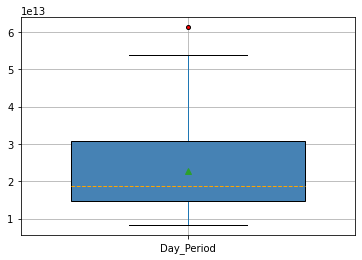

In [119]:
daytime2.boxplot(column=["Day_Period"], whis = 1.5, widths = 0.7, patch_artist = True, showmeans = True, boxprops = {'facecolor':'steelblue'}, flierprops = {'markerfacecolor':'red', 'markersize':4}, medianprops = {'linestyle':'--','color':'orange'}, labels = [''])

The boxplot becomes normal after drop 5 outliers. And its magnitude is different from microwaves.

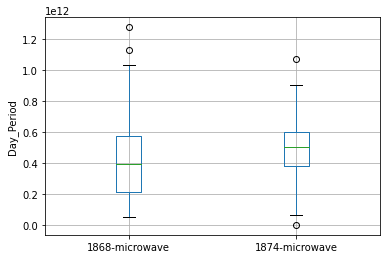

In [121]:
boxplotdata = pd.DataFrame({'1868-microwave': daytime["Day_Period"], '1874-microwave': daytime1["Day_Period"]})
boxplotdata.boxplot() 
plt.ylabel("Day_Period")
plt.show()
# They have the same magnitude!

It seems that microwaves in both 1868 and 1874 homes have similar scope of usage period, at least the same magnitude.

Text(0.5, 1.0, 'Day Period - Distribution Diagram')

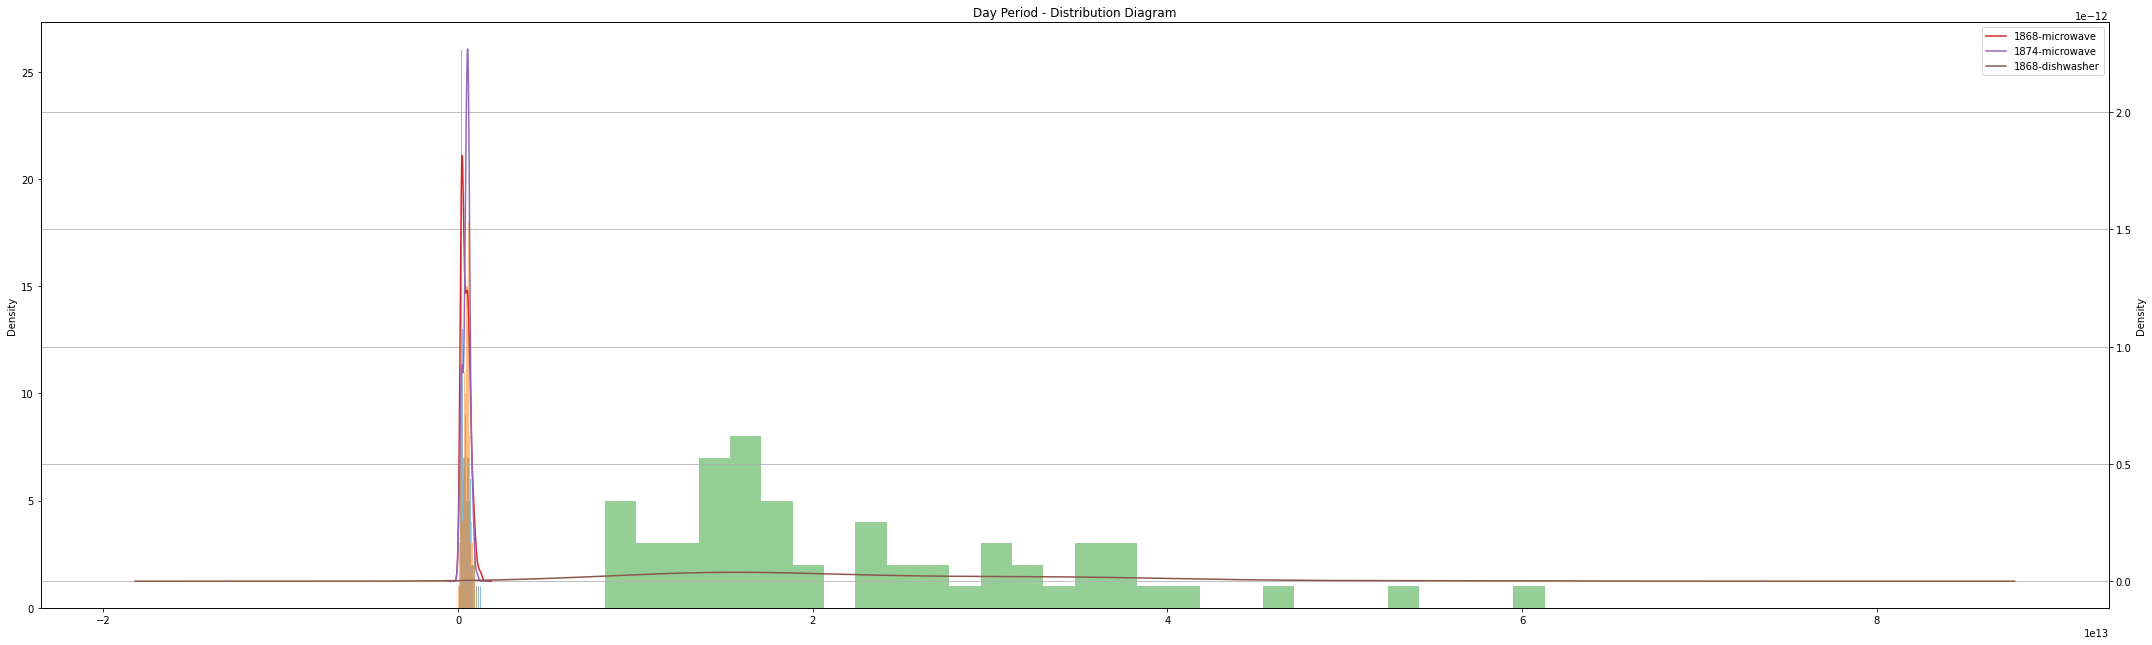

In [122]:
fig = plt.figure(figsize = (30,9)) # This size of graph suits for both data and my screen
daytime["Day_Period"].hist(bins = 30, alpha = 0.5)
daytime1["Day_Period"].hist(bins = 30, alpha = 0.5)
daytime2["Day_Period"].hist(bins = 30, alpha = 0.5)
daytime["Day_Period"].plot(kind = 'kde', secondary_y = True, label = '1868-microwave')
daytime1["Day_Period"].plot(kind = 'kde', secondary_y = True, label = '1874-microwave')
daytime2["Day_Period"].plot(kind = 'kde', secondary_y = True, label = '1868-dishwasher')
plt.xlabel('Day_Period')
plt.ylabel('Density')
plt.tight_layout()
plt.grid()
plt.legend(loc = 'upper right')
plt.title('Day Period - Distribution Diagram')

It's obviously that the time consumption of microwaves and dishwashers have quite different magnitude. It would be better if comparing 1868-microwave and 1874-microwave directly and let 1868-dishwasher alone.

Text(0.5, 1.0, 'Day Period - Distribution Diagram')

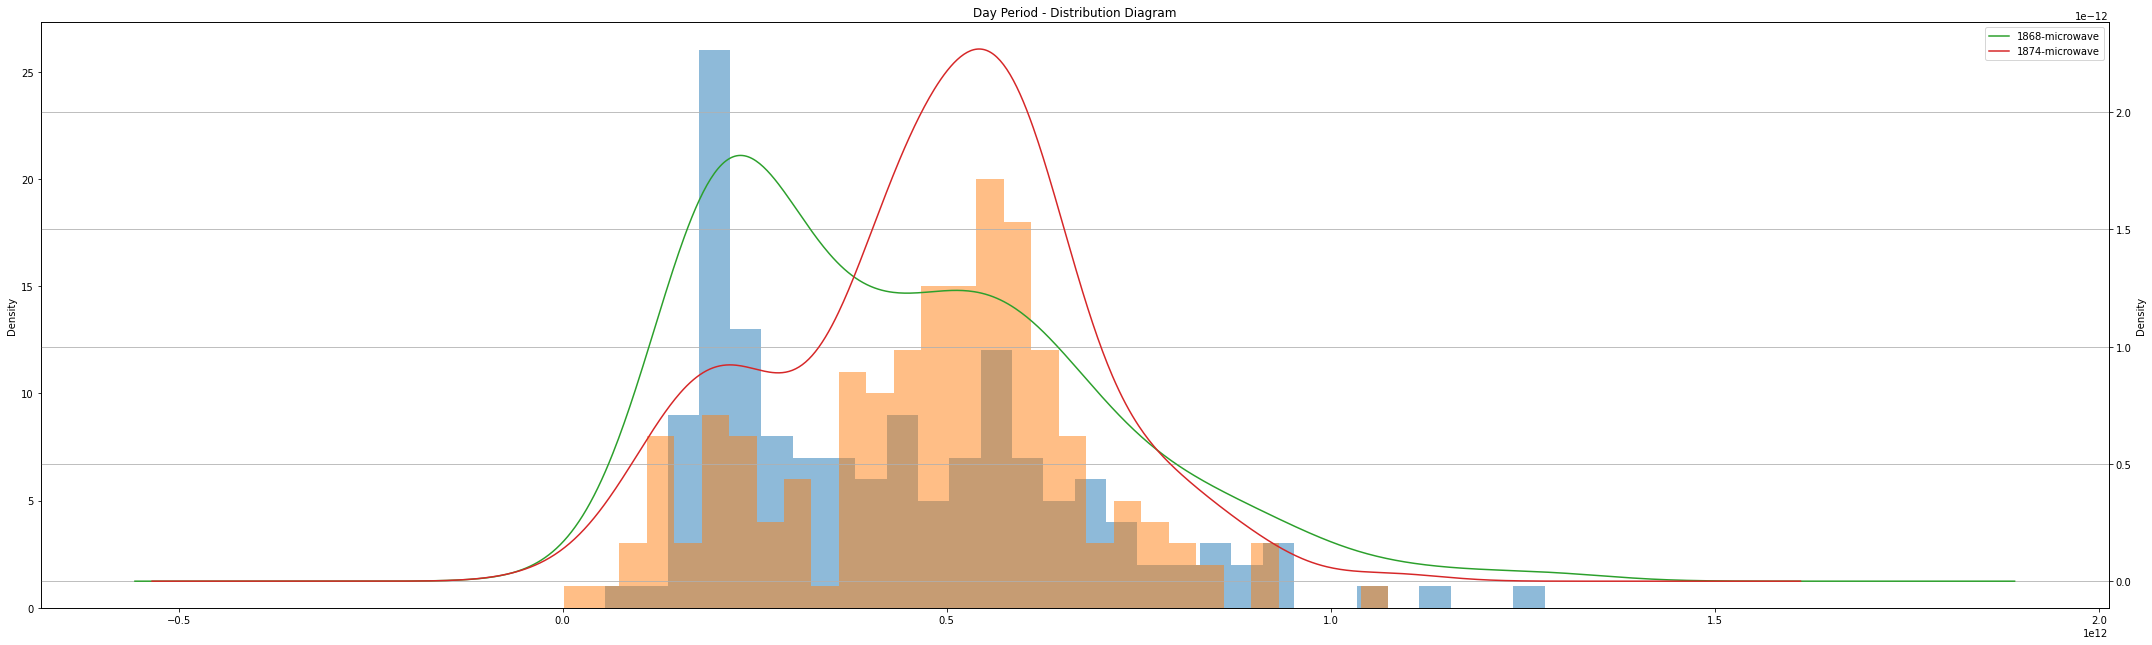

In [124]:
# Select 2 microwaves, do the same analysis
fig = plt.figure(figsize = (30,9))
daytime["Day_Period"].hist(bins = 30, alpha = 0.5)
daytime1["Day_Period"].hist(bins = 30, alpha = 0.5)
daytime["Day_Period"].plot(kind = 'kde', secondary_y = True, label = '1868-microwave')
daytime1["Day_Period"].plot(kind = 'kde', secondary_y = True, label = '1874-microwave')
plt.xlabel('Day_Period')
plt.ylabel('Density')
plt.tight_layout()
plt.grid()
plt.legend(loc = 'upper right')
plt.title('Day Period - Distribution Diagram')

I love this diagram! It looks like pixel style!

In [125]:
# K-S Test
from scipy import stats
data = daytime["Day_Period"]
df = pd.DataFrame(data, columns =['value'])
u = daytime["Day_Period"].values.mean()  # Calculate mean
std = daytime["Day_Period"].values.std()  # Calculate std
stats.kstest(daytime["Day_Period"].values, 'norm', (u, std)) 
# statistic → D value，pvalue → P value
# If p value > 0.05, it is normal distribution

KstestResult(statistic=0.12072638335718433, pvalue=0.024493806871916712)

As 0.0244938 < 0.05, the daily usage period of 1868-microwave was not normal distribution.

In [126]:
data = daytime1["Day_Period"]
df = pd.DataFrame(data, columns =['value'])
u = daytime1["Day_Period"].values.mean() 
std = daytime1["Day_Period"].values.std() 
stats.kstest(daytime1["Day_Period"].values, 'norm', (u, std)) 

KstestResult(statistic=0.06901695093228155, pvalue=0.32341133151166745)

As 0.3234113 > 0.05, the daily usage period of 1874-microwave was normal distribution.

In [387]:
# T-Test
stats.levene(daytime["Day_Period"], daytime1["Day_Period"])
# Two individual samples need to do F-Test before T-Test using either levene or bartlett.
# If the value returned > 0.05, then the two samples have equal variance. If not, they don't have equal variance and it's a must to add 'equal_var = False' and do T'-Test.

LeveneResult(statistic=9.438937805813467, pvalue=0.0022999632554013033)

In [128]:
# 0.0022999 < 0.05
stats.ttest_ind(daytime["Day_Period"], daytime1["Day_Period"], equal_var = False)

Ttest_indResult(statistic=-1.811352404236032, pvalue=0.07115525366775895)

As 0.071155 was a little larger than 0.05, there exist some variance difference between the daily usage of the two microwaves. Their trends on diagrams also explain it.

Text(0.5, 1.0, 'Day Period - Distribution Diagram')

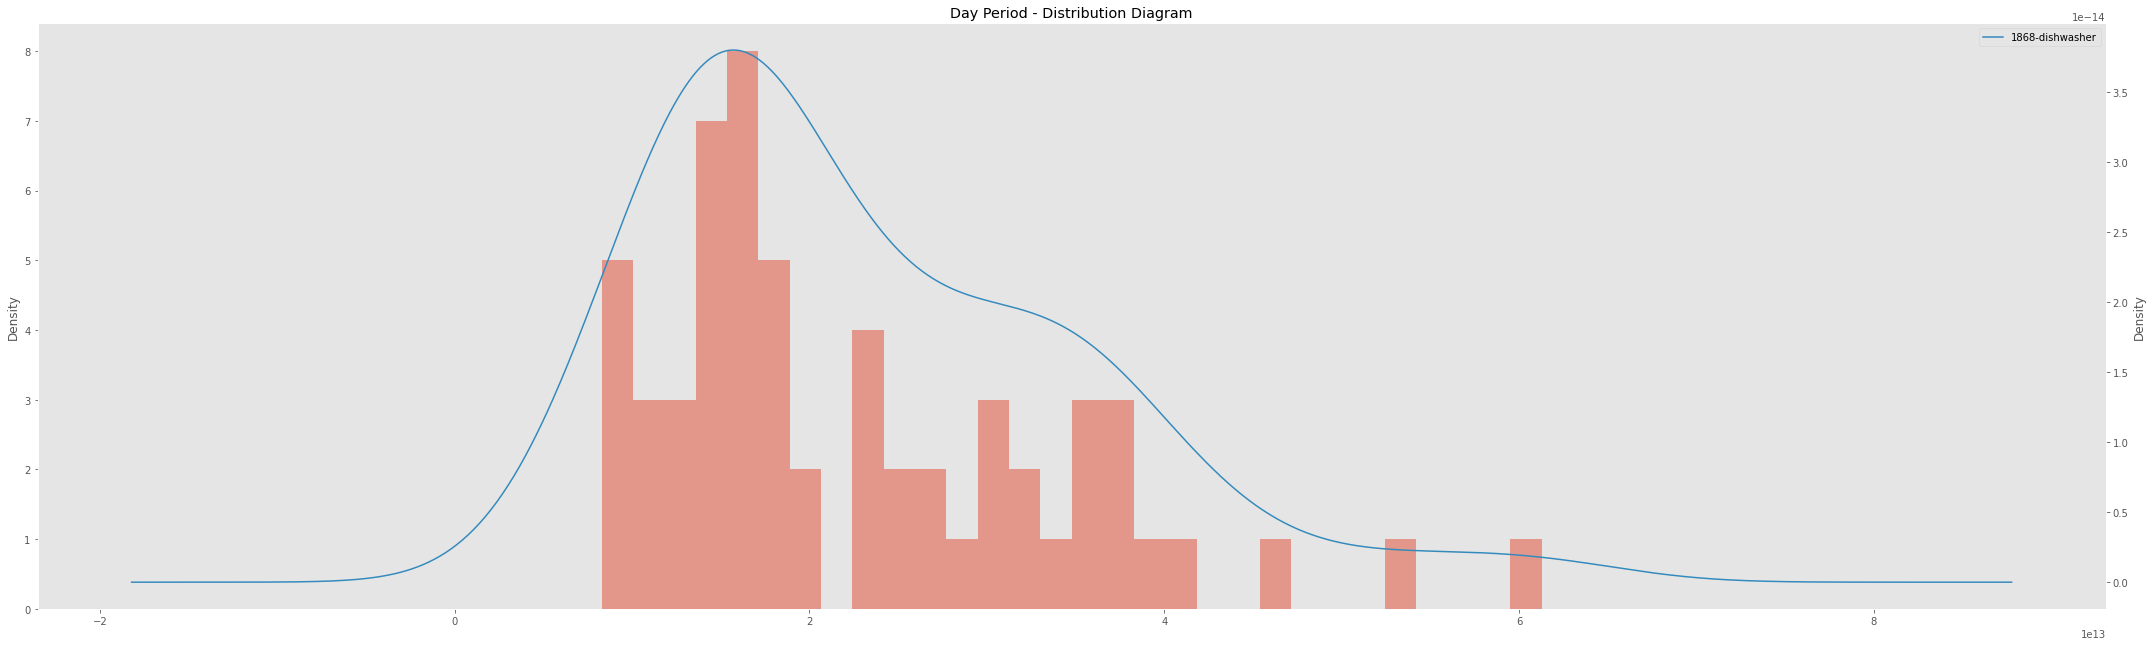

In [269]:
fig = plt.figure(figsize = (30,9))
daytime2["Day_Period"].hist(bins = 30, alpha = 0.5)
daytime2["Day_Period"].plot(kind = 'kde', secondary_y = True, label = '1868-dishwasher')
plt.xlabel('Day_Period')
plt.ylabel('Density')
plt.tight_layout()
plt.grid()
plt.legend(loc = 'upper right')
plt.title('Day Period - Distribution Diagram')

In [396]:
data = daytime2["Day_Period"]
df = pd.DataFrame(data, columns = ['value'])
u = daytime2["Day_Period"].values.mean() 
std = daytime2["Day_Period"].values.std()  
stats.kstest(daytime2["Day_Period"].values, 'norm', (u, std)) 

KstestResult(statistic=0.17296348937291794, pvalue=0.05163807855157754)

As 0.051638 was a little large than 0.05, the daily usage period of the dishwasher was normal distribution. Let's look at its skewness and kurtosis to confirm.

In [129]:
print('Skewness:%f'%daytime2["Day_Period"].skew())
print('Kurtosis:%f'%daytime2["Day_Period"].kurt())

Skewness:1.091146
Kurtosis:1.074361


Skewness = 1.091146 > 0, positive deviation. The long tail is trailing to the right, and there are some outliers at the right end of the data.

Kurtosis = 1.074361 > 0, it's steeper than normal distribution.

In [130]:
stats.levene(daytime["Day_Period"], daytime2["Day_Period"])

LeveneResult(statistic=162.9299287517704, pvalue=7.6499874383963005e-28)

In [131]:
stats.ttest_ind(daytime["Day_Period"], daytime2["Day_Period"])

Ttest_indResult(statistic=-23.418862737512764, pvalue=7.426922982847918e-60)

As pvalues were smaller than 0.05, there exist variance difference between the daily usage of 1868's microwave and dishwasher. However, their trends seem the same.

Also, it is an essential skill to use chi2_contingency() to calculate the p-value between corresponding data. 
* P > 0.05 The probability of coincidental occurrence is greater than 5%. The null hypothesis cannot be denied. There is no significant difference between the two groups.
* P < 0.05 The probability of coincidental occurrence is lower than 5%. The null hypothesis can be denied. There is significant difference between the two groups.
* P < 0.01 The probability of coincidental occurrence is lower than 1%. The null hypothesis can be denied. There is large significant difference between the two groups.

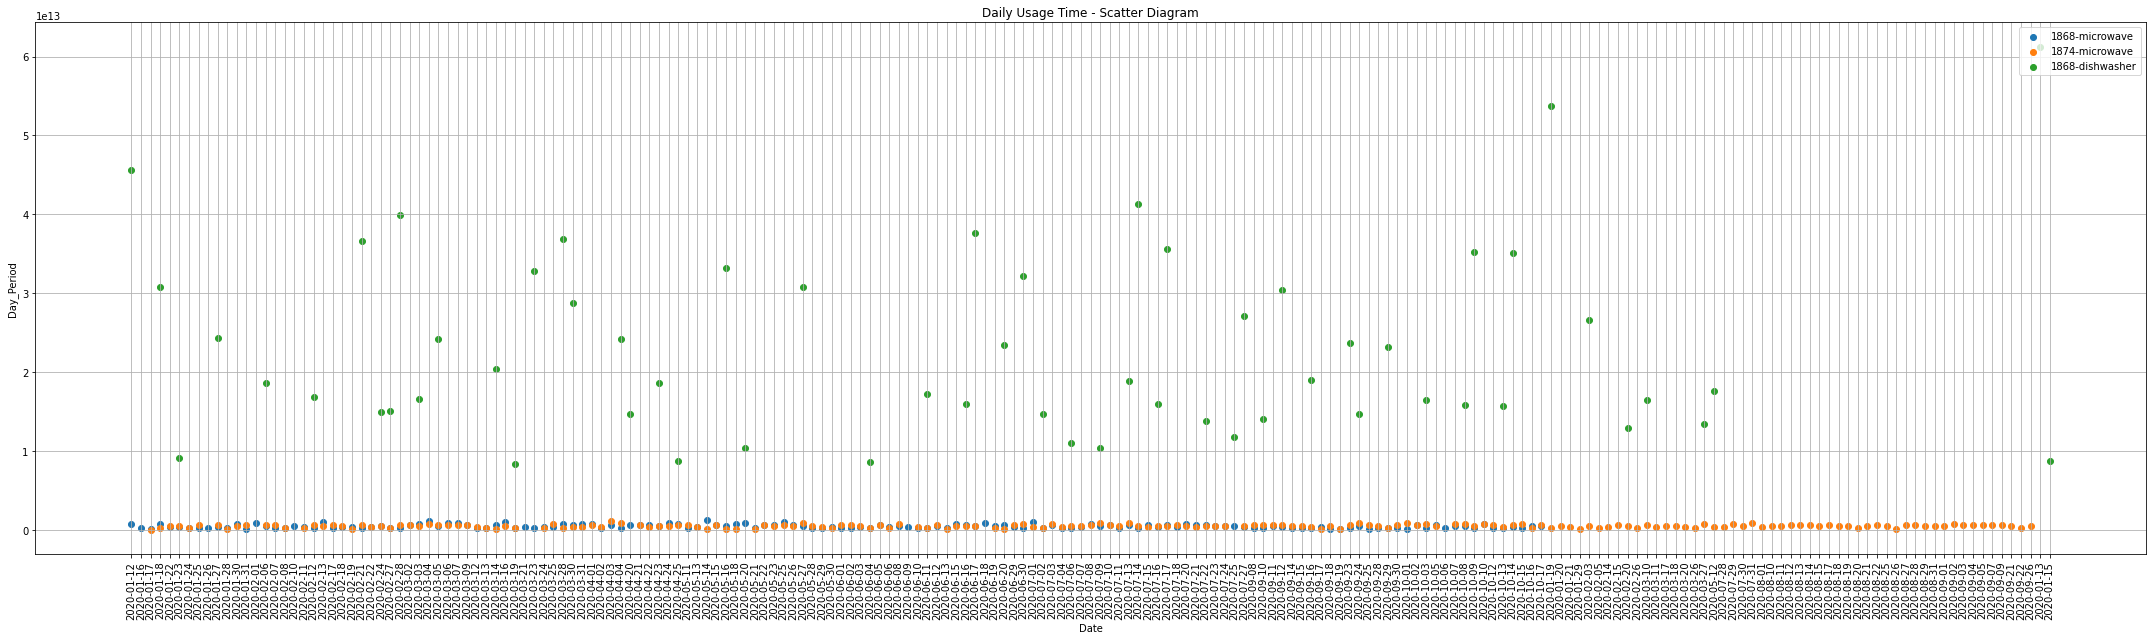

In [132]:
fig = plt.figure(figsize = (30,9))
plt.scatter(daytime["Date"], daytime["Day_Period"].values, label = '1868-microwave')
plt.scatter(daytime1["Date"], daytime1["Day_Period"].values, label = '1874-microwave')
plt.scatter(daytime2["Date"], daytime2["Day_Period"].values, label = '1868-dishwasher')
plt.xlabel('Date')
plt.ylabel('Day_Period')
plt.xticks(rotation = 90)
plt.grid()
plt.legend(loc = 'upper right')
plt.title('Daily Usage Time - Scatter Diagram') # Shape a comprehensive scatter diagram
plt.tight_layout()

This diagram can be regarded as 1868-dishwasher its own...

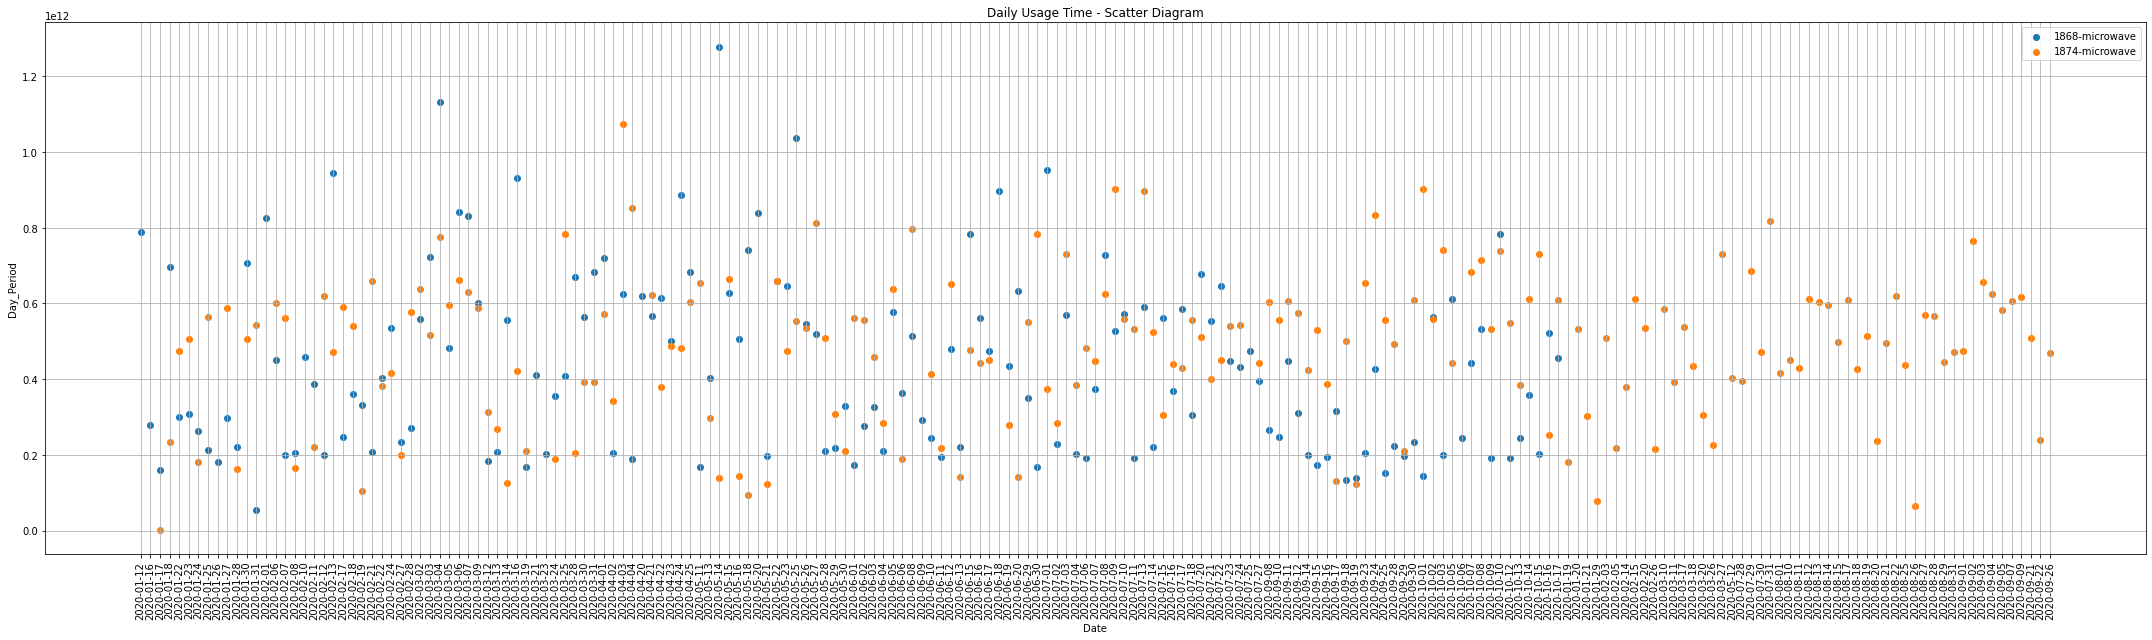

In [137]:
fig = plt.figure(figsize = (30,9))
plt.scatter(daytime["Date"], daytime["Day_Period"].values, label = '1868-microwave')
plt.scatter(daytime1["Date"], daytime1["Day_Period"].values, label = '1874-microwave')
plt.xlabel('Date')
plt.ylabel('Day_Period')
plt.xticks(rotation = 90)
plt.grid()
plt.legend(loc = 'upper right')
plt.title('Daily Usage Time - Scatter Diagram')
plt.tight_layout()

Beautiful diagram with mixed data!

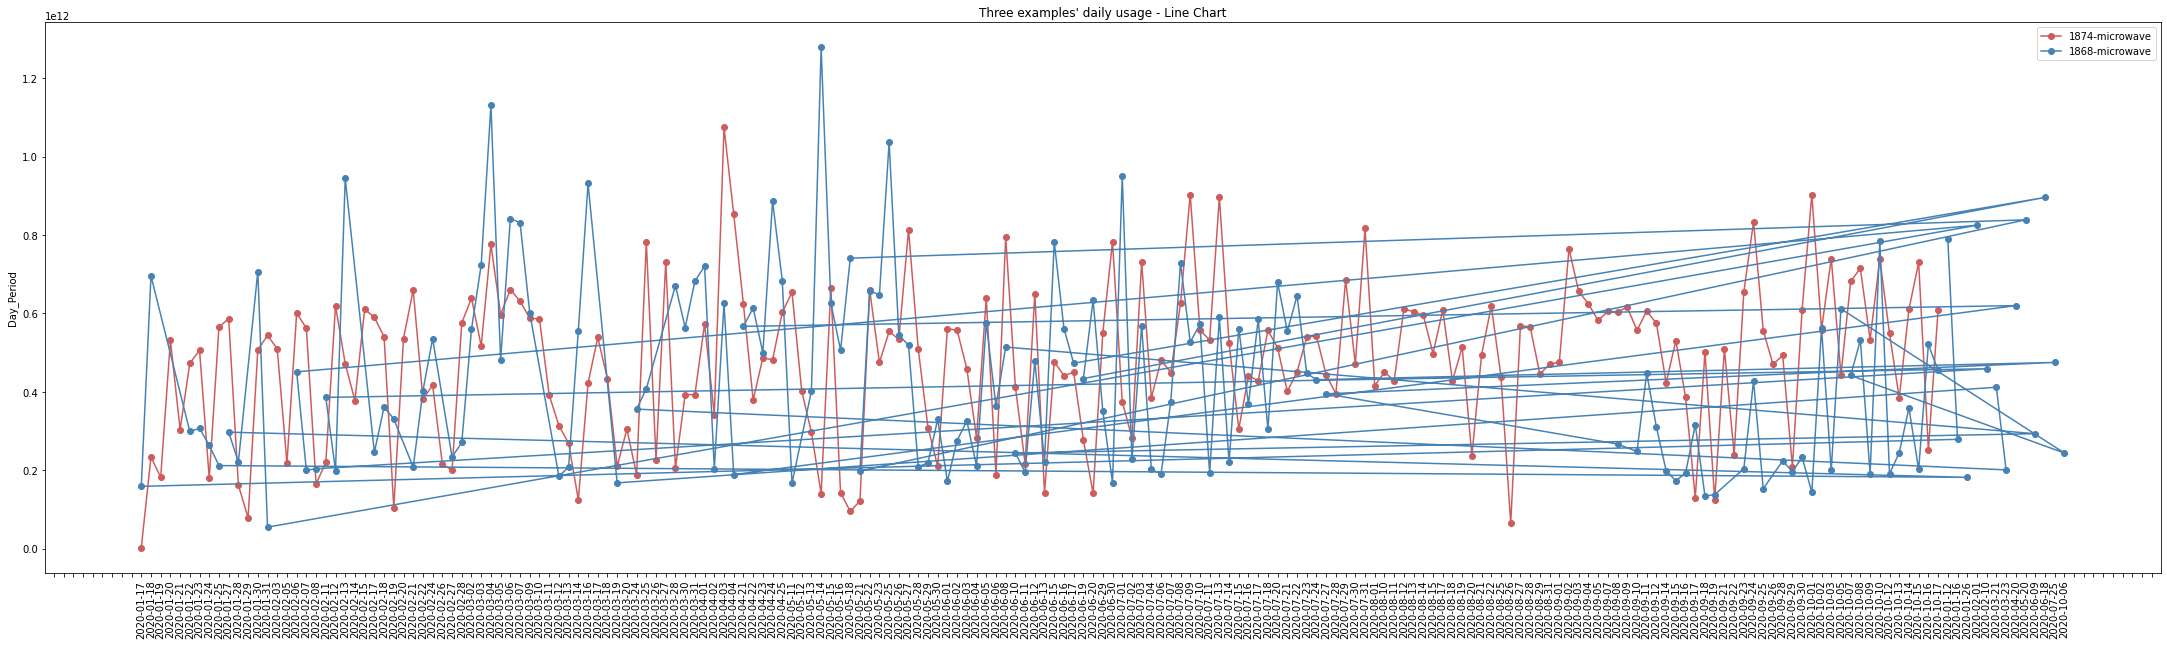

In [154]:
fig = plt.figure(figsize = (30,9))
plt.plot_date(daytime1["Date"], daytime1["Day_Period"], linestyle = '-', color = 'indianred', label = '1874-microwave')
plt.plot_date(daytime["Date"], daytime["Day_Period"], linestyle = '-', color = 'steelblue', label = '1868-microwave')
plt.xticks(rotation = 90)
ax = plt.subplot(1,1,1)
xlocator = matplotlib.ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(xlocator)
plt.tight_layout()
plt.ylabel('Day_Period')
plt.title("Three examples' daily usage - Line Chart")
plt.legend()
plt.show()

Fantastic art! Those flying and messy lines are caused by different sample dates of microwaves of ID 1868 and ID 1874. It can be seen that there exist a clear red line and a clear blue line among them. Those dates that 1868-microwave has but 1874-microwave not are listed in the right corner of the x axis, so the blue line flies to and fro to match those redundant points. 

According to this graph, I have 3 methods to solve, each has its advantages and disadvantages.
* Use the union set of the date of both 1868-microwave and 1874-microwave. In this way, no data will be dropped, the trend can be summarized through a full line graph.
* Use the intersection of the date of both 1868-microwave and 1874-microwave. Though some data won't be exhibited on the graph, comparison is clearer for every date has two data points.
* Use natural day from the earliest date to the last date of both microwaves. This line graph will have regular interval, no-data date has no points instead of 0 points, but lines will across the date.

In [156]:
import scipy as sp
import scipy.stats
import time 

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    q1 = m / 1000000000
    q2 = (m - h) / 1000000000
    q3 = (m + h) / 1000000000
    p1 = time.strftime("%H:%M:%S", time.localtime(q1))
    p2 = time.strftime("%H:%M:%S", time.localtime(q2))
    p3 = time.strftime("%H:%M:%S", time.localtime(q3))
    return p1, p2, p3

print(mean_confidence_interval(daytime["Day_Period"]))
print(mean_confidence_interval(daytime1["Day_Period"]))
print(mean_confidence_interval(daytime2["Day_Period"]))

('00:07:14', '00:06:35', '00:07:53')
('00:07:58', '00:07:30', '00:08:26')
('06:21:16', '05:30:28', '07:12:04')


As was mentioned above, 

the 95% confidence interval of 1868-microwave's usage period per day was from '00:06:35' to '00:07:53'.

the 95% confidence interval of 1874-microwave's usage period per day was from '00:07:30' to '00:08:26'.

the 95% confidence interval of 1868-dishwasher's usage period per day was from '05:30:28' to '07:12:04'.

### Reflection

Have I finished assignment 2? Amazing! 

This homework was much more difficult than the first one, please look at the fulfilling progress bar at the lower right corner! Though I'm not sure whether I have answered correctly and suitably about all the questions of 'describe, explore and reflect & hypothesis' that are listed on the handbook, I have tried to solve them during my exploration of the data we were provided. And I involve my answers among texts, graphs, comments, etc. They're not orderly answered, especially some hypothesis and test methods, hope tutors can find them. 

I learned some hypothesis-test methods in my undergraduate period, and forgot them after examination. This assignment reminds me of that time of calculating and searching charts. Reviewing is always a beneficial thing! Though I have never thought I'll review them. The calculation method of daily usage duration consists many loops, which confused me for some time. After running it successfully, I can't help telling my group members the good news! As I'm focusing on duration, there're also some parts I might ignore. Our data look easy but difficult actually. We need to generate new data from given data. Also, the duration of every use was also essential to show, I use daily duration mainly at present. I'll explore more and take charge of this part.

I like drawing diagrams with good-looking colours. I found a colour map and their corresponding names in python. The colour map makes me enjoy drawing. Texts and comments can both help me and readers to understand my codes and thoughts. Readers can also see my informal comments here!

Good coding styles are also what I'm persuing. I always set blanks after comma, next to '=' and other operators. I hope to learn more so-called good coding styles. And I learned a lesson from the evaluation of assignment 1. I added 'check all things are correct instead of none are wrong' assertation, explained deeper with full sentences and graphs, tried different methods to verify one thing and remembered to add labels and titles for diagrams.